In [7]:
import numpy as np
import cifar10_input
import matplotlib.pyplot as plt

In [135]:
def nn_analysis(target):
    """Nearest neighbors for generated samples"""
    
    x_train_class = x_train[y_train == target]
    x_hat = np.load('class{}_synthesized.npy'.format(target)) / 255.0

    x_train_class_flat = x_train_class.reshape([-1, 32*32*3])
    x_hat_flat = x_hat.reshape([-1, 32*32*3])

    # Normalize samples to have Euclidean norm of 1
    x_train_class_flat = x_train_class_flat/np.linalg.norm(x_train_class_flat, axis=1, keepdims=True)
    x_hat_flat = x_hat_flat/np.linalg.norm(x_hat_flat, axis=1, keepdims=True)

    # Distance matrix - cosine distance
    dists = np.dot(x_hat_flat, x_train_class_flat.T)
    # Sorted indices in ascending order
    indices = np.argsort(dists, axis=1)

    nrows = 5
    ncols = 10
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, dpi=100, figsize=(10, 5))
    for ax in axes.ravel():
        ax.set_axis_off()
    axes[0, 0].set_title('generated')
    axes[0, 1].set_title('neighbors...')
    for row in range(nrows):
        row_indices = indices[row][::-1]
        axes[row, 0].imshow(x_hat[row])
        for col in range(1, ncols):
            axes[row, col].imshow(x_train_class[row_indices[col-1]])
    plt.subplots_adjust(top = 1, bottom = 0, right=1, left=0, hspace = 0.05, wspace = 0.05)
    plt.show()

In [136]:
cifar = cifar10_input.CIFAR10Data('cifar10_data')

In [137]:
x_train = cifar.train_data.xs.astype(np.float32) / 255.0
y_train = cifar.train_data.ys

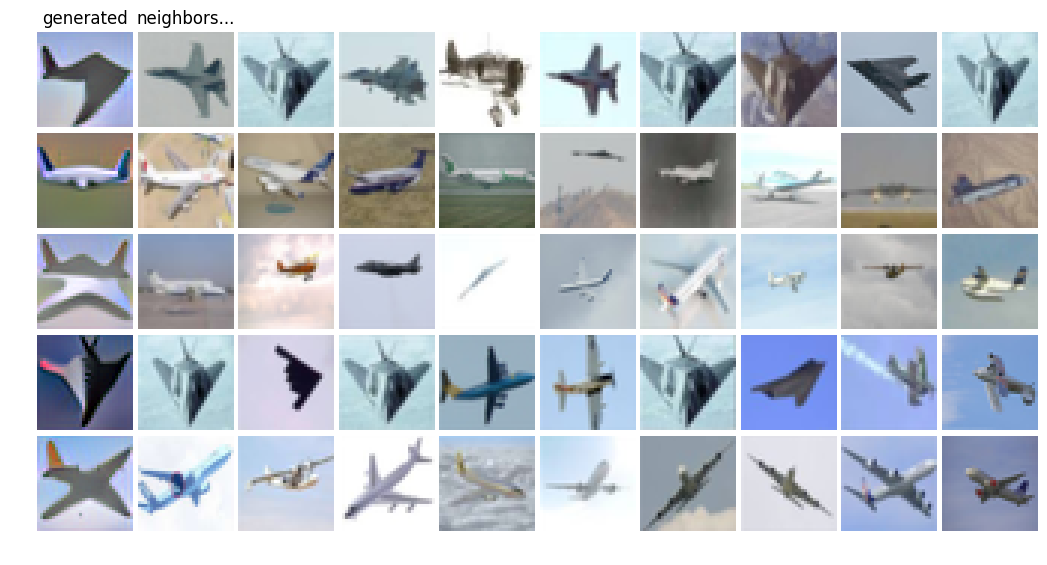

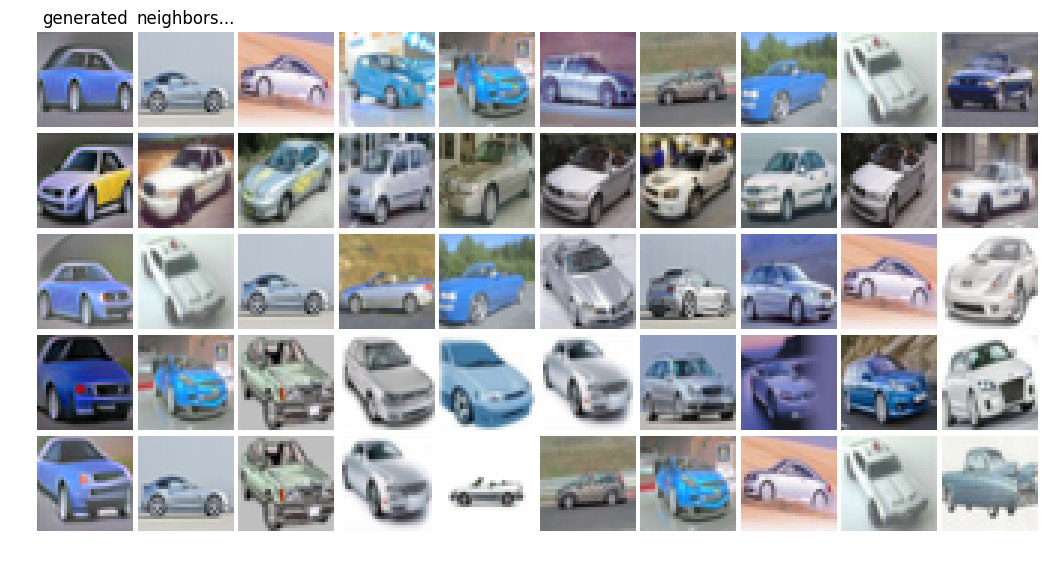

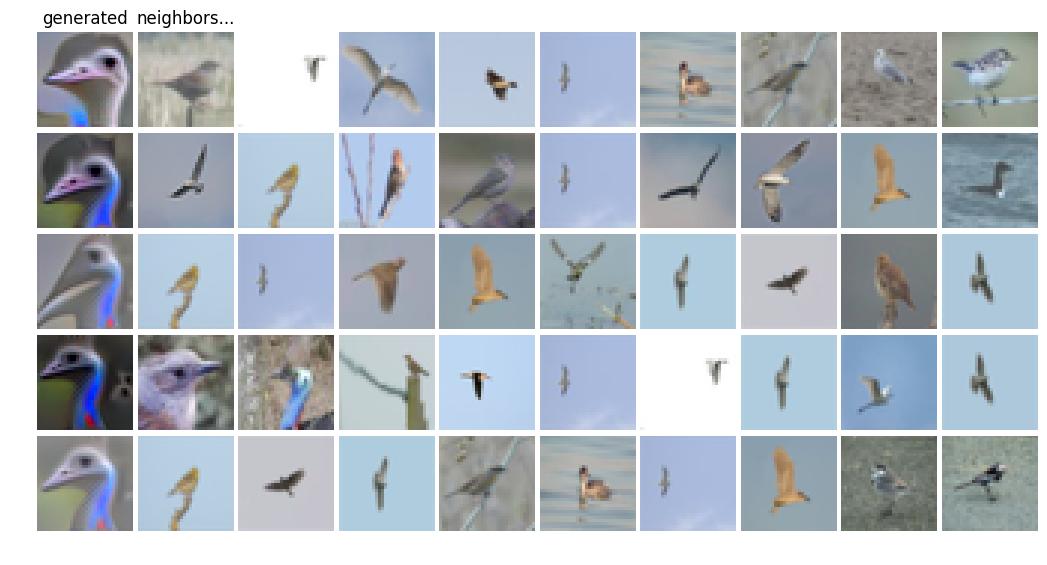

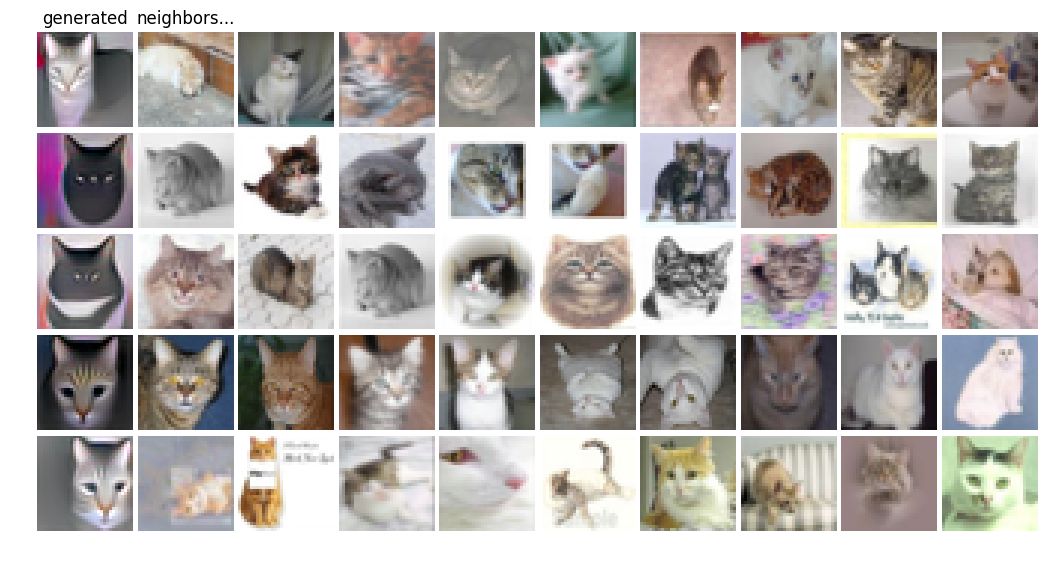

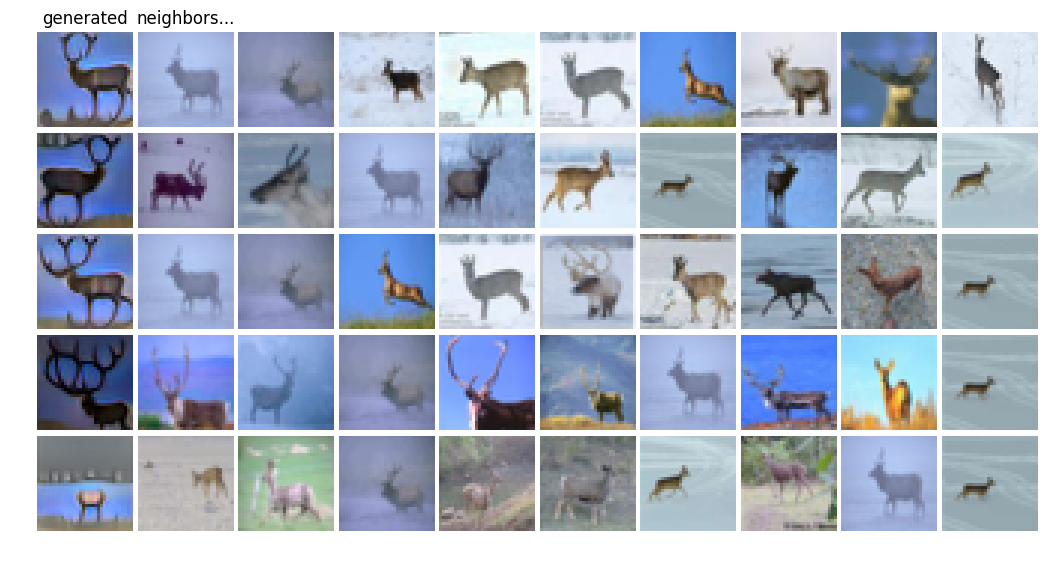

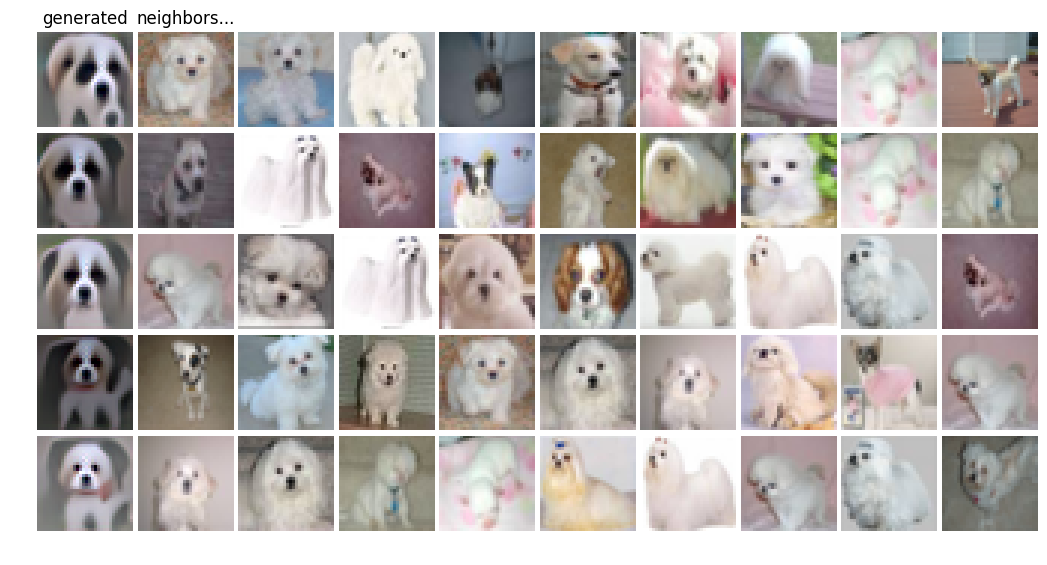

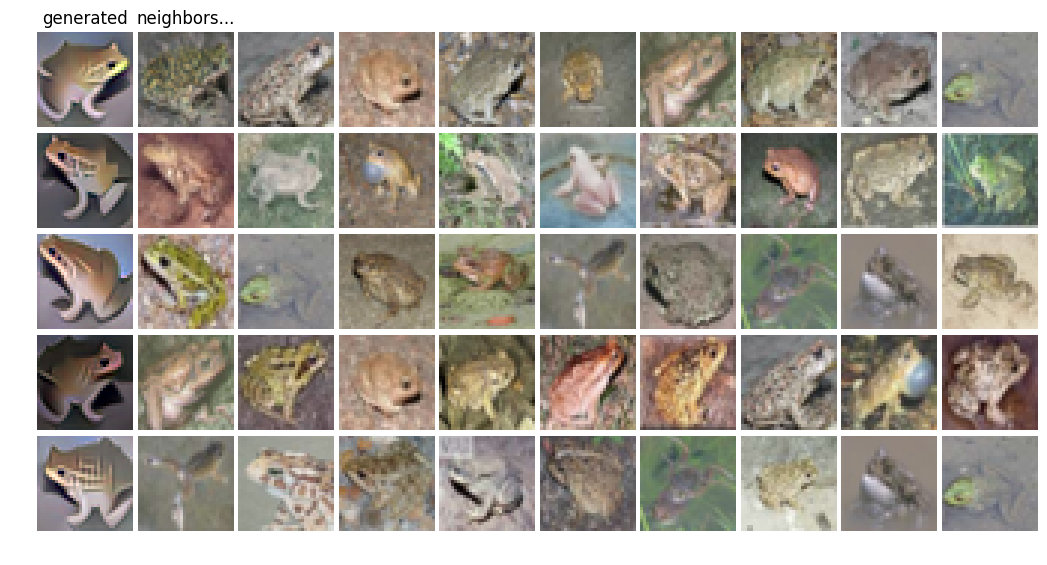

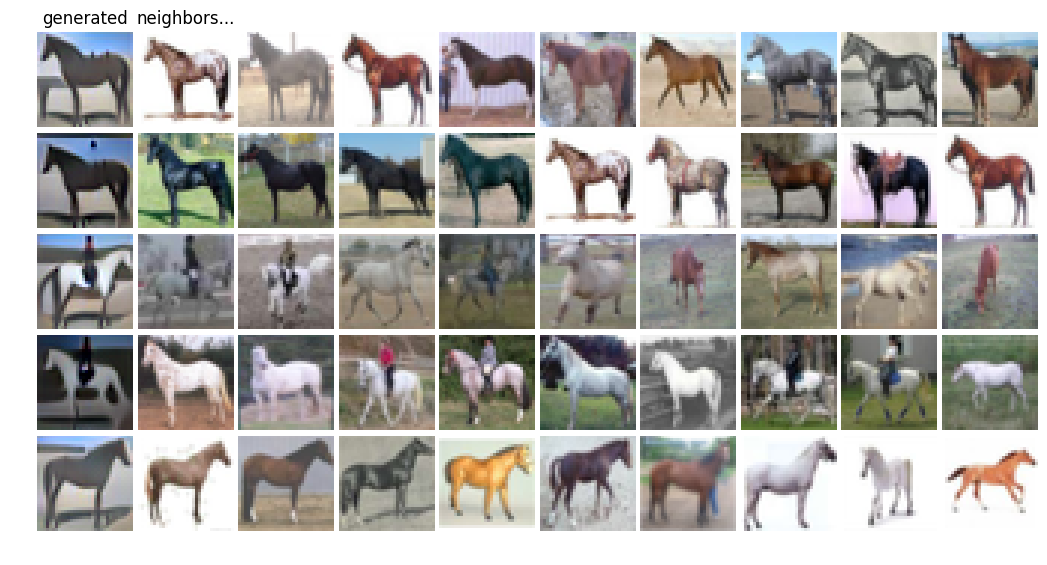

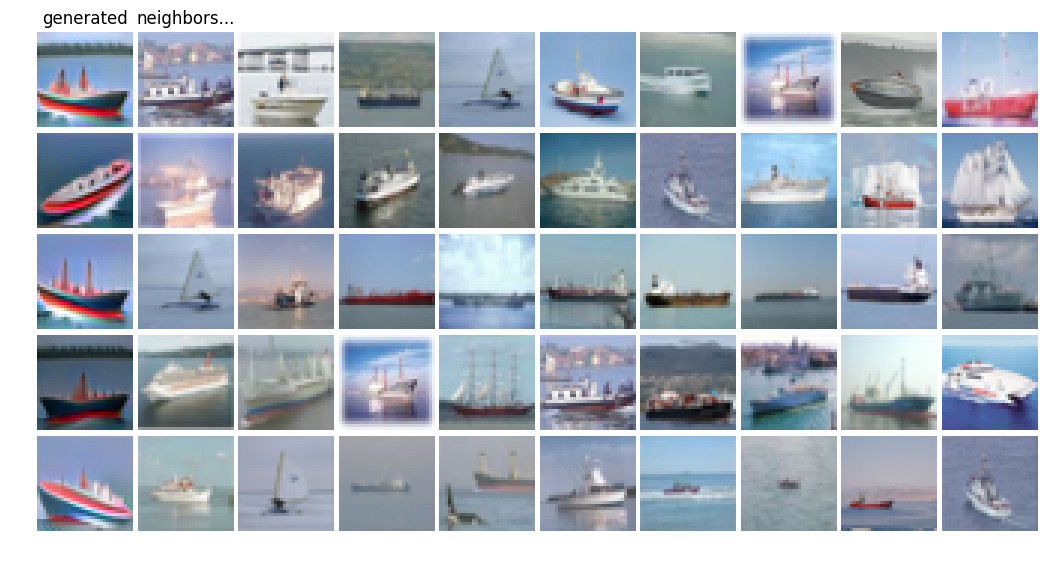

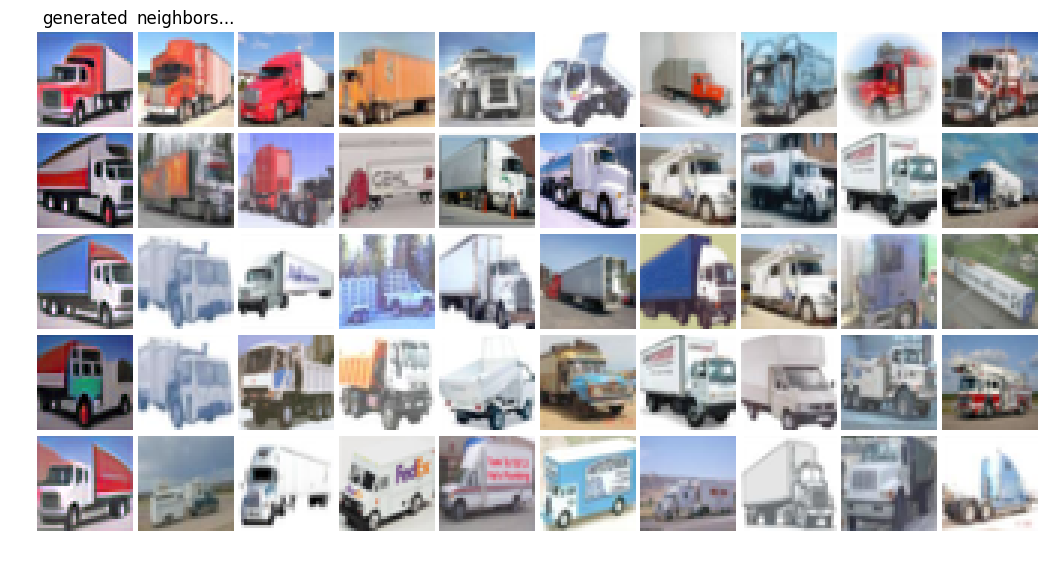

In [140]:
for i in range(10):
    nn_analysis(i)